In [7]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import jax.numpy as jnp
import jax.tree_util as jtu

from jax_canveg import load_model
from jax_canveg.shared_utilities.plot import plot_flux_modis_obs
from jax_canveg.shared_utilities.plot import plot_dij
from jax_canveg.physics.energy_fluxes import get_dispersion_matrix

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)

# Site locations

In [5]:
sites = ['US-Bi1', 'US-Hn1', 'US-Me2', 'US-Whs']
locs = [[-121.49933, 38.0991538], [-119.275, 46.4089], 
        [-121.5574, 44.4523], [-110.0522, 31.7438]]
lons = np.array([l[0] for l in locs])
lats = np.array([l[1] for l in locs])


# Plot

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-125.00000000000001,29.000000000000004,-105.00000000000001,48.00000000000001&bboxSR=4326&imageSR=4326&size=1000,950&dpi=96&format=png32&transparent=true&f=image


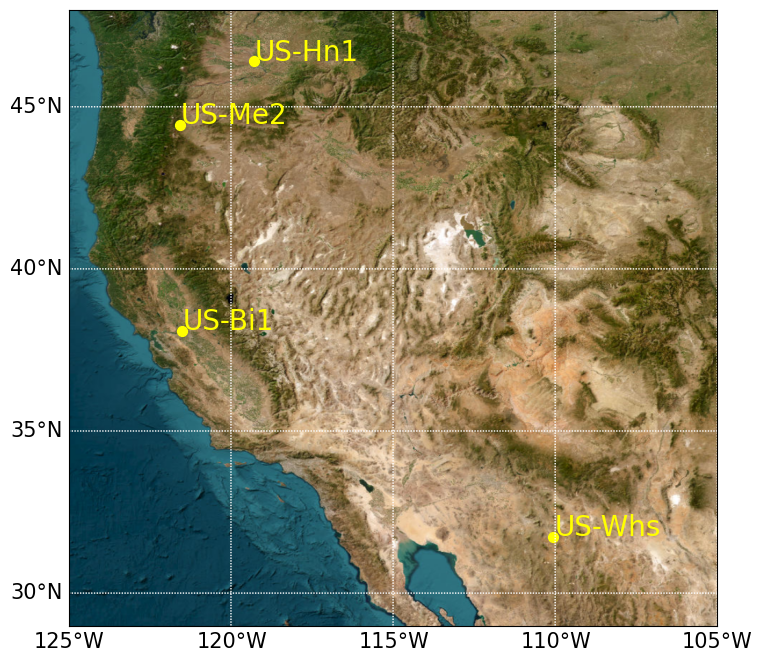

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# m = Basemap(ax=ax,width=2000000,height=2500000,projection='lcc',
#             resolution='h',lat_0=41., lon_0=-115.)
m = Basemap(llcrnrlon=-125,llcrnrlat=29,urcrnrlon=-105,urcrnrlat=48, epsg=4326)
x, y = m(lons,lats)
# m.bluemarble(scale=4)
# m.drawlsmask()
# m.drawrivers()
m.arcgisimage(service='World_Imagery', xpixels=1000, verbose= True)
m.drawparallels(np.arange(-90.,91.,5.), color='white', labels=[1,0,0,0])  # Parallels with labels
m.drawmeridians(np.arange(-180.,181.,5.), color='white', labels=[0,0,0,1]);  # Meridians with labels
m.scatter(x, y, marker='o', color='yellow', s=50)
for site, xpt, ypt in zip(sites, x, y):
    ax.text(xpt+0.02, ypt+0.02, site, color='yellow', fontsize=20)  # Add label with small offset
plt.savefig('./site_map.png', dpi=300)


# Plot the forcing and flux data

In [9]:
# Current directory
dir_mother = Path(os.getcwd())


In [26]:
met_set, obs_set = [], []
for i,site in enumerate(sites):
    # Stay in the current directory
    os.chdir(dir_mother)
    
    dir_case = dir_mother / f"{site}" / 'test-model'
    f_configs = dir_case / "configs.json"
    model, met_train, met_test, obs_train, obs_test = load_model(f_configs)
    met = jtu.tree_map(lambda x, y: jnp.append(x, y), met_train, met_test)
    obs = jtu.tree_map(lambda x, y: jnp.append(x, y), obs_train, obs_test)
    met_set.append(met)
    obs_set.append(obs)

/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both", inplace=True)
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both", inplace=True)
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both

/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/shared_utilities/plot.py:947: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=15, ha="right")
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/shared_utilities/plot.py:947: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=15, ha="right")
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/shared_utilities/plot.py:947: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=15, ha="right")
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/shared_utilities/plot.py:947: UserWarning: set_ticklabels(

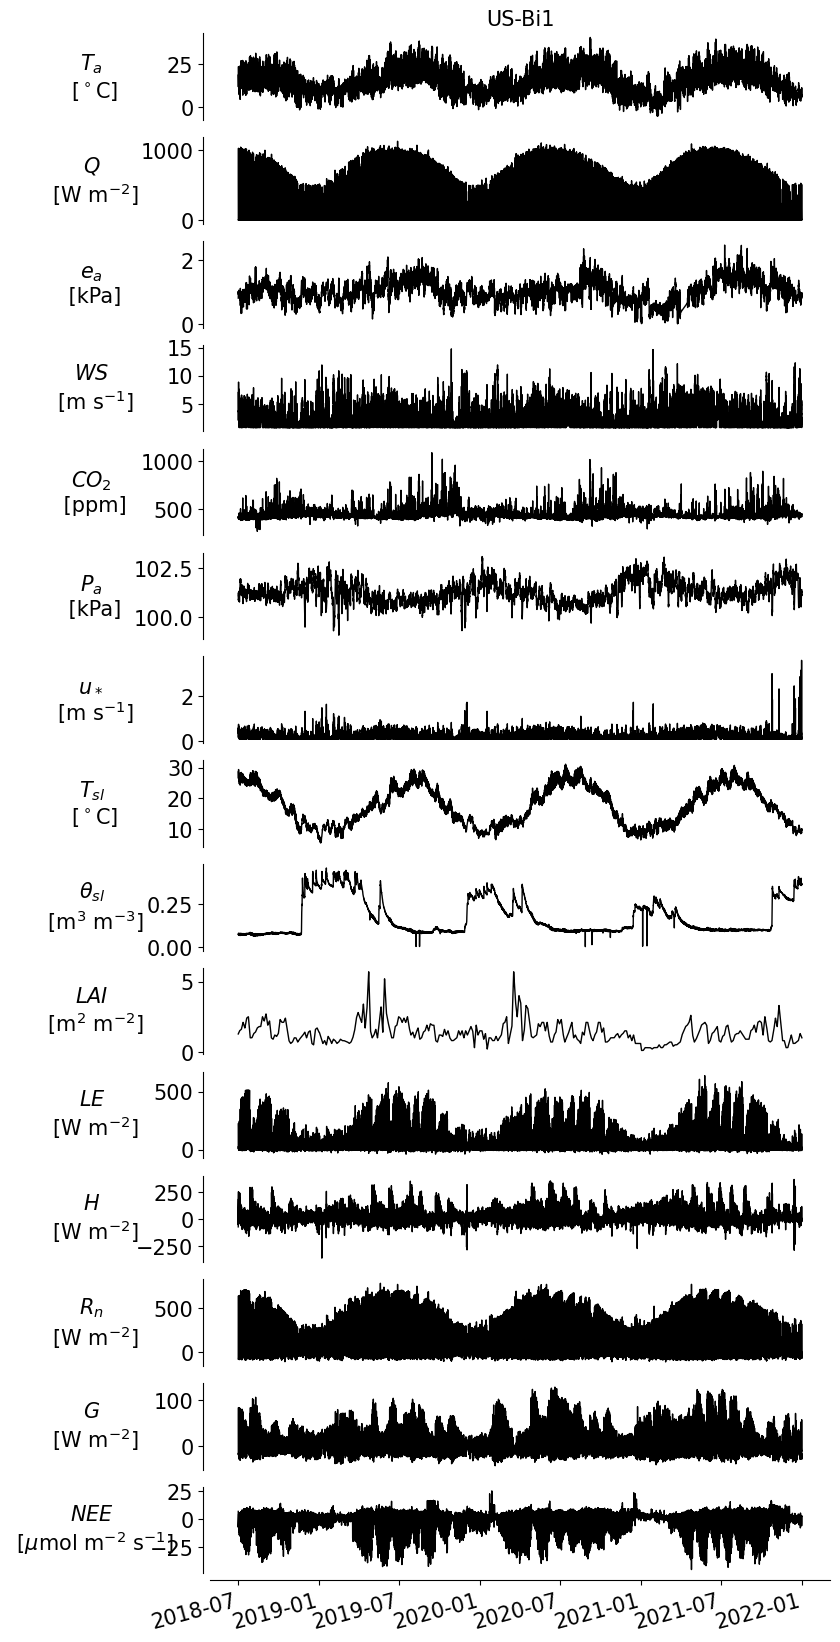

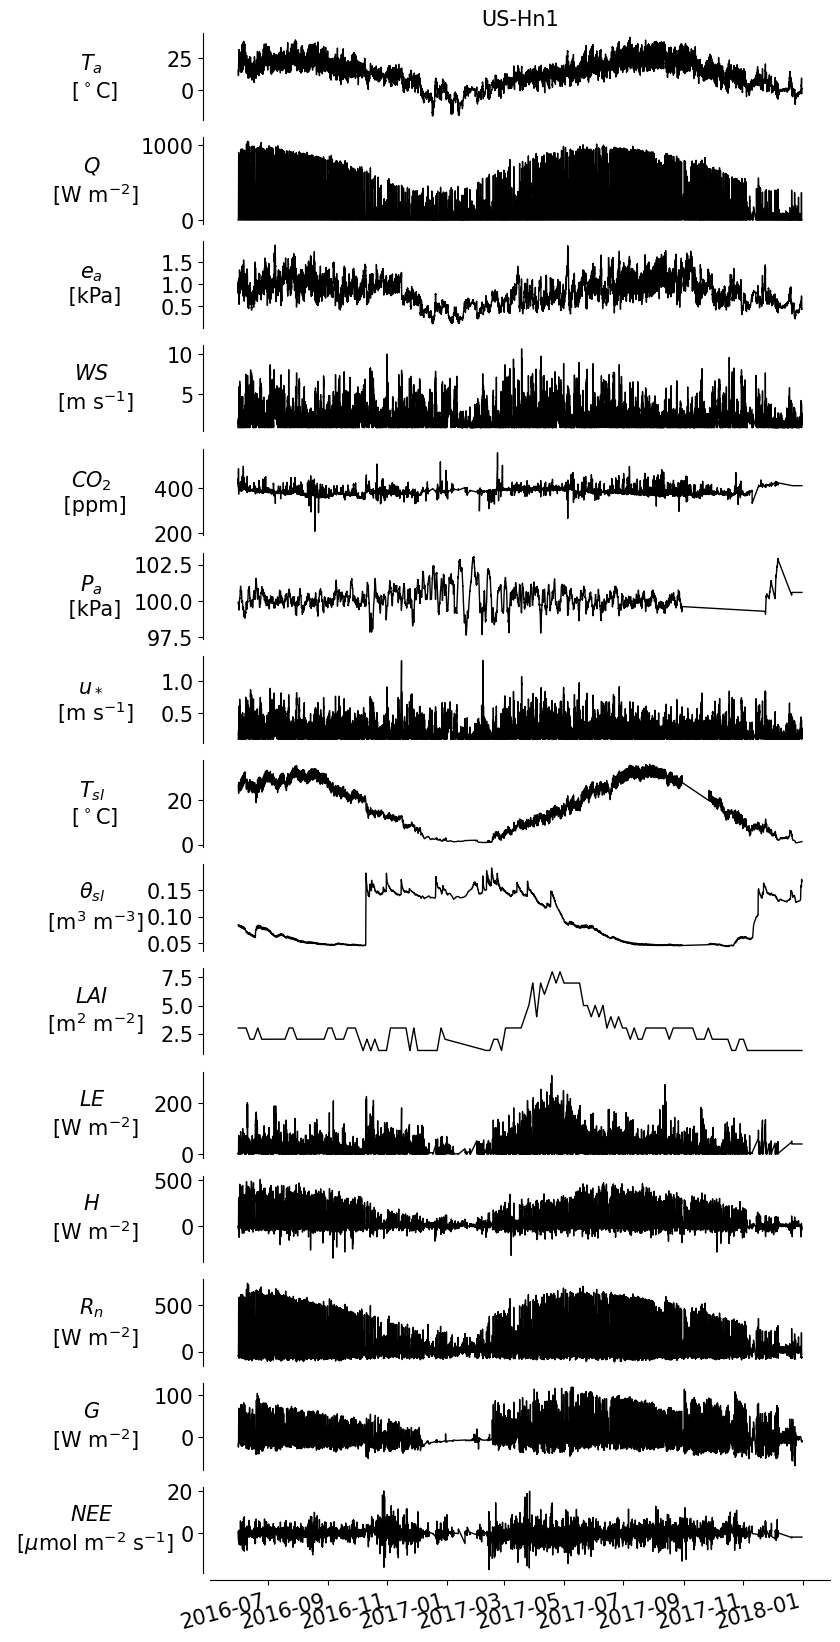

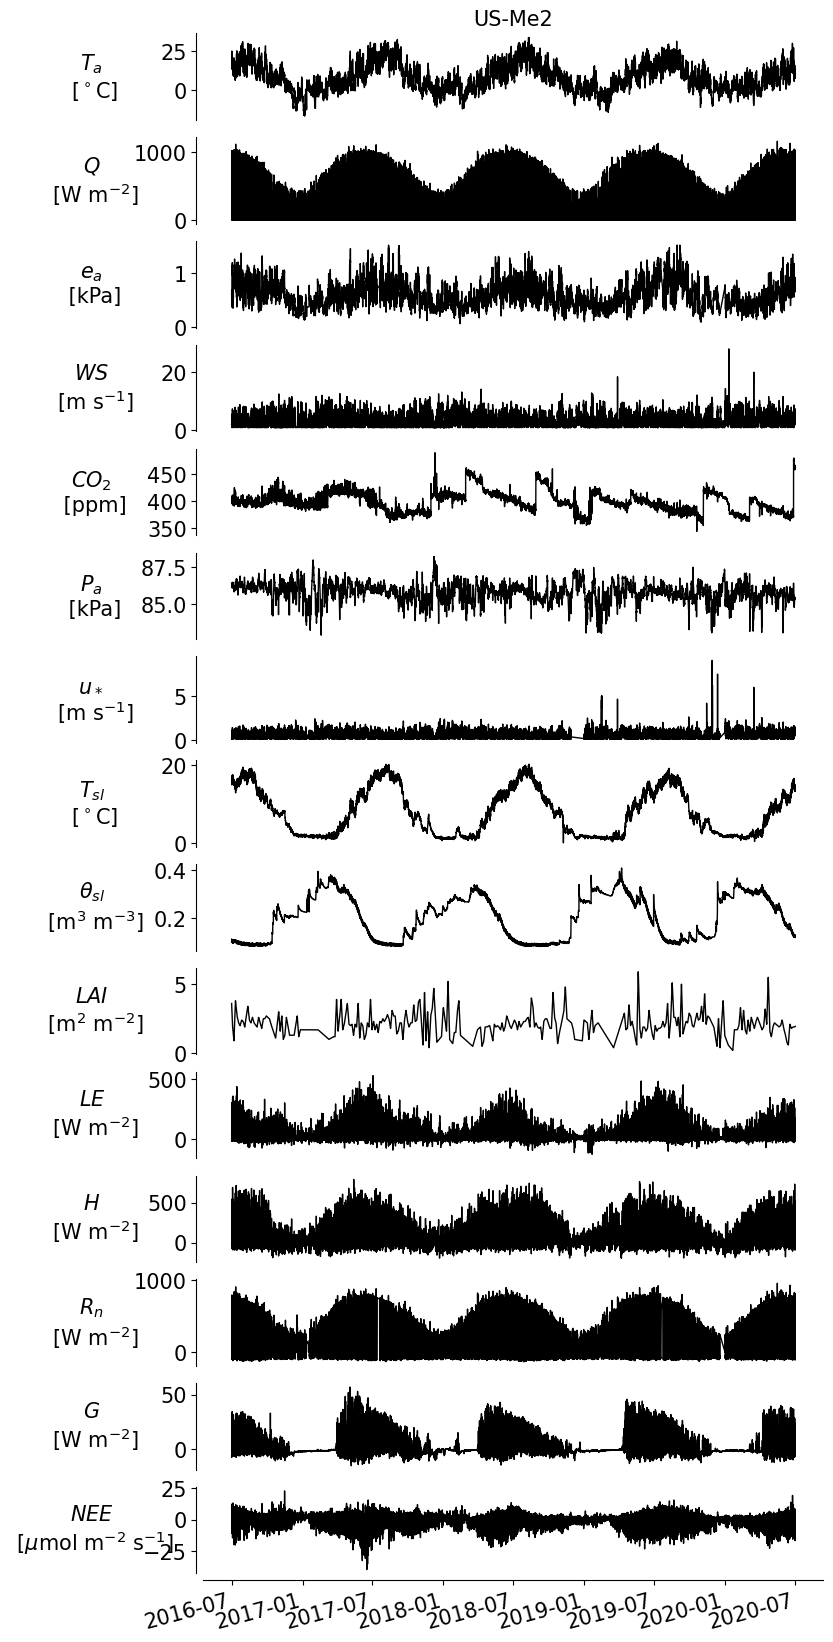

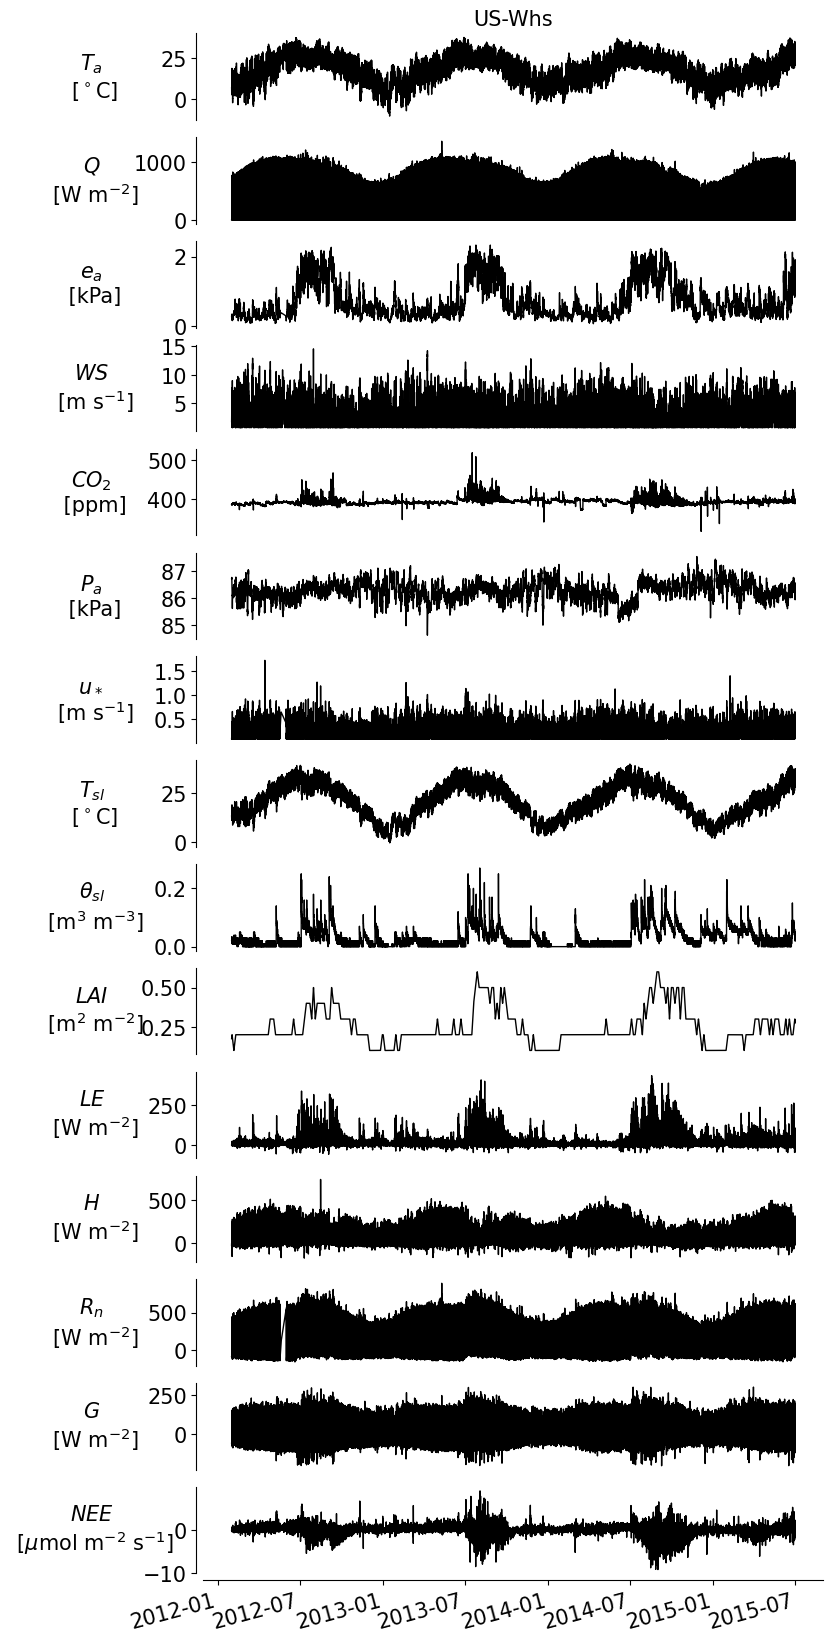

In [46]:
for i,site in enumerate(sites):
    met, obs = met_set[i], obs_set[i]
    plot_flux_modis_obs(obs, met, site)
    

In [9]:
# f_train_forcings_set = ["US-Bi1-forcings.csv", "US-Hn1-forcings.csv", "US-Me2-forcings.csv", "US-Whs-forcings.csv"]
# f_test_forcings_set = ["US-Bi1-forcings-test.csv", "US-Hn1-forcings-test.csv", "US-Me2-forcings-test.csv", "US-Whs-forcings-test.csv"]
# f_train_fluxes_set = ["US-Bi1-fluxes.csv", "US-Hn1-fluxes-nonegle.csv", "US-Me2-fluxes.csv", "US-Whs-fluxes.csv"]
# f_test_fluxes_set = ["US-Bi1-fluxes-test.csv", "US-Hn1-fluxes-nonegle-test.csv", "US-Me2-fluxes-test.csv", "US-Whs-fluxes-test.csv"]

# f_train_forcings_set = [Path(f"../data/fluxtower/{sites[i]}") / f_train_forcings_set[i] for i in range(len(sites))]
# f_test_forcings_set = [Path(f"../data/fluxtower/{sites[i]}") / f_test_forcings_set[i] for i in range(len(sites))]
# f_train_fluxes_set = [Path(f"../data/fluxtower/{sites[i]}") / f_train_fluxes_set[i] for i in range(len(sites))]
# f_test_fluxes_set = [Path(f"../data/fluxtower/{sites[i]}") / f_test_fluxes_set[i] for i in range(len(sites))]


In [10]:
# df_train_forcings_set, df_test_forcings_set = [], []
# df_train_fluxes_set, df_test_fluxes_set = [], []

# for i in range(len(sites)):
#     f_train_forcings, f_test_forcings = f_train_forcings_set[i], f_test_forcings_set[i]
#     f_train_fluxes, f_test_fluxes = f_train_fluxes_set[i], f_test_fluxes_set[i]
#     df_train_forcings = pd.read_csv(f_train_forcings, index_col=0, parse_dates=True)
#     df_test_forcings = pd.read_csv(f_test_forcings, index_col=0, parse_dates=True)
#     df_train_fluxes = pd.read_csv(f_train_fluxes, index_col=0, parse_dates=True)
#     df_test_fluxes = pd.read_csv(f_test_fluxes, index_col=0, parse_dates=True)
#     df_train_forcings_set.append(df_train_forcings)
#     df_test_forcings_set.append(df_test_forcings)
#     df_train_fluxes_set.append(df_train_fluxes)
#     df_test_fluxes_set.append(df_test_fluxes)
    

In [12]:
# df_train_forcings

# Plot Dij

In [19]:
model_1l_set, model_ml_set = [], []
for i,site in enumerate(sites):
    # Stay in the current directory
    os.chdir(dir_mother)
    
    dir_case = dir_mother / f"{site}" / 'PB-ML-0.1'
    f_configs = dir_case / "configs.json"
    model, _, _, _, _ = load_model(f_configs)
    model_ml_set.append(model)
    
    dir_case = dir_mother / f"{site}" / 'PB-1L-0.1'
    f_configs = dir_case / "configs.json"
    model, _, _, _, _ = load_model(f_configs)
    model_1l_set.append(model)


/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both", inplace=True)
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both", inplace=True)
/global/cfs/cdirs/m1800/peishi/JAX-CanVeg/src/jax_canveg/subjects/initialization_update.py:350: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  obs.interpolate(method="linear", limit_direction="both

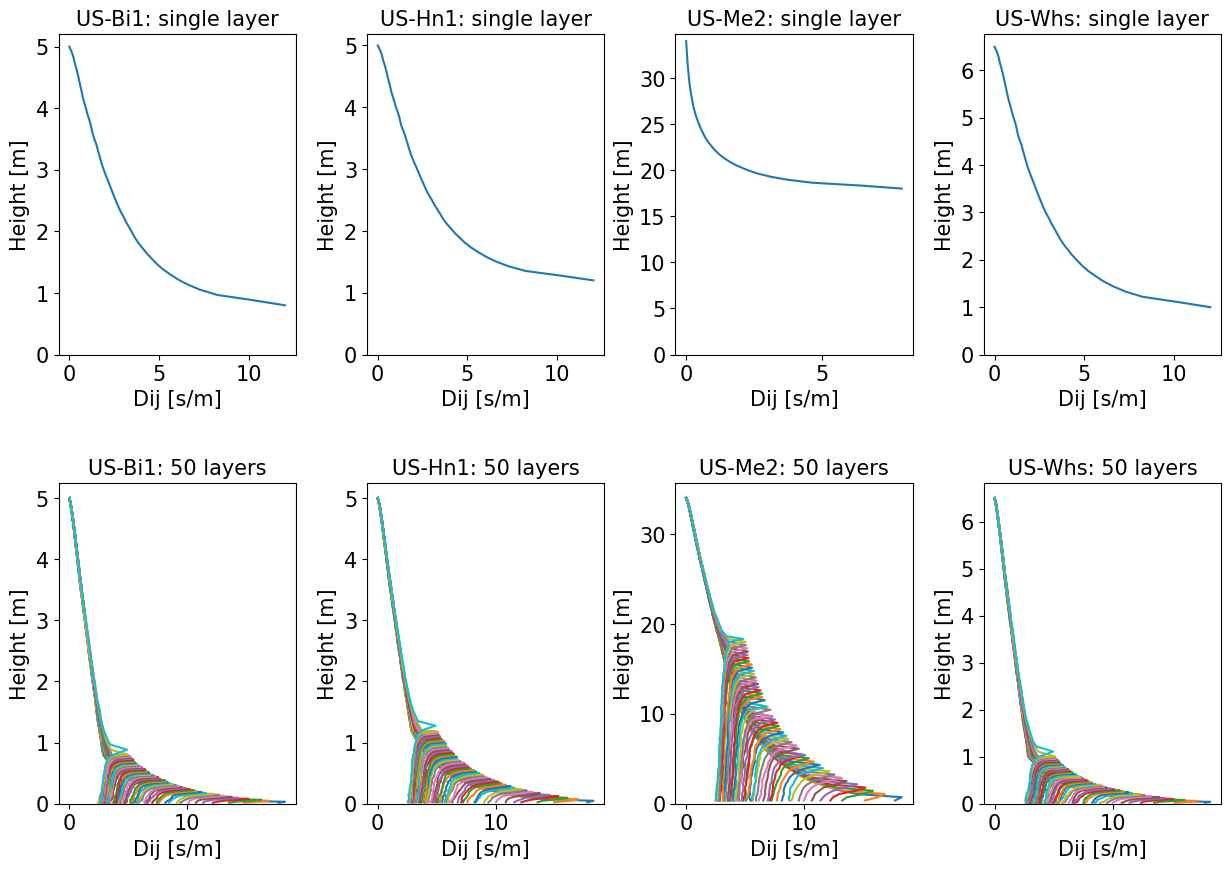

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(15,10))
for i,site in enumerate(sites):
    plot_dij(model_1l_set[i].dij, model_1l_set[i].para, ax=axes[0,i])
    axes[0,i].set(title=f"{site}: single layer", ylim=[0,None])
    plot_dij(model_ml_set[i].dij, model_ml_set[i].para, ax=axes[1,i])
    axes[1,i].set(title=f"{site}: 50 layers", ylim=[0,None])
plt.subplots_adjust(wspace=0.3, hspace=0.4)
